In [459]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [460]:
df = pd.read_csv("10k_synthea_covid19_csv/patients.csv")

In [461]:
df.columns

Index(['Id', 'BIRTHDATE', 'DEATHDATE', 'SSN', 'DRIVERS', 'PASSPORT', 'PREFIX',
       'FIRST', 'LAST', 'SUFFIX', 'MAIDEN', 'MARITAL', 'RACE', 'ETHNICITY',
       'GENDER', 'BIRTHPLACE', 'ADDRESS', 'CITY', 'STATE', 'COUNTY', 'ZIP',
       'LAT', 'LON', 'HEALTHCARE_EXPENSES', 'HEALTHCARE_COVERAGE'],
      dtype='object')

In [462]:
# df = df.drop(['LAT', 'LON', 'ZIP', 'DEATHDATE',''], axis=1)
df = df[['FIRST', 'LAST', 'MAIDEN', 'SSN', 'DRIVERS', 'BIRTHDATE', 'PASSPORT', 'ADDRESS', 'CITY']]

In [463]:
df.head()

,FIRST,LAST,MAIDEN,SSN,DRIVERS,BIRTHDATE,PASSPORT,ADDRESS,CITY
0,Jacinto644,Kris249,NaN,999-68-6630,NaN,2017-08-24,NaN,888 Hickle Ferry Suite 38,Springfield
1,Alva958,Krajcik437,NaN,999-15-5895,NaN,2016-08-01,NaN,1048 Skiles Trailer,Walpole
2,Jayson808,Fadel536,NaN,999-27-3385,S99971451,1992-06-30,X53218815X,1056 Harris Lane Suite 70,Chicopee
3,Jimmie93,Harris789,NaN,999-73-2461,S99956432,2004-01-09,NaN,201 Mitchell Lodge Unit 67,Pembroke
4,Gregorio366,Auer97,NaN,999-60-7372,S99917327,1996-11-15,X58903159X,1050 Lindgren Extension Apt 38,Boston


In [464]:
df.fillna('', inplace=True)

In [465]:
df['FIRST'] = df['FIRST'].apply(lambda x: ''.join(i for i in x if not i.isdigit()))
df['LAST'] = df['LAST'].apply(lambda x: ''.join(i for i in x if not i.isdigit()))
df['MAIDEN'] = df['MAIDEN'].apply(lambda x: ''.join(i for i in x if not i.isdigit()))

In [466]:
df.columns

Index(['FIRST', 'LAST', 'MAIDEN', 'SSN', 'DRIVERS', 'BIRTHDATE', 'PASSPORT',
       'ADDRESS', 'CITY'],
      dtype='object')

In [467]:
df['BIRTHDATE'] = df['BIRTHDATE'].apply(lambda x: x + '---- PI')
df['SSN'] = df['SSN'].apply(lambda x:  x + '---- PI')
df['DRIVERS'] = df['DRIVERS'].apply(lambda x: x + '---- PI')
df['PASSPORT'] = df['PASSPORT'].apply(lambda x: x + '---- PI')
# df['BIRTHPLACE'] = df['BIRTHPLACE'].apply(lambda x: x + '---- PI')
df['ADDRESS'] = df['ADDRESS'].apply(lambda x: x + '---- PI')
df['CITY'] = df['CITY'].apply(lambda x: x + '---- PI')

In [468]:
df = df.ne(0).mul(df.columns)+'==='+df.astype(str)

In [469]:
df

,FIRST,LAST,MAIDEN,SSN,DRIVERS,BIRTHDATE,PASSPORT,ADDRESS,CITY
0,FIRST===Jacinto,LAST===Kris,MAIDEN===,SSN===999-68-6630---- PI,DRIVERS===---- PI,BIRTHDATE===2017-08-24---- PI,PASSPORT===---- PI,ADDRESS===888 Hickle Ferry Suite 38---- PI,CITY===Springfield---- PI
1,FIRST===Alva,LAST===Krajcik,MAIDEN===,SSN===999-15-5895---- PI,DRIVERS===---- PI,BIRTHDATE===2016-08-01---- PI,PASSPORT===---- PI,ADDRESS===1048 Skiles Trailer---- PI,CITY===Walpole---- PI
2,FIRST===Jayson,LAST===Fadel,MAIDEN===,SSN===999-27-3385---- PI,DRIVERS===S99971451---- PI,BIRTHDATE===1992-06-30---- PI,PASSPORT===X53218815X---- PI,ADDRESS===1056 Harris Lane Suite 70---- PI,CITY===Chicopee---- PI
3,FIRST===Jimmie,LAST===Harris,MAIDEN===,SSN===999-73-2461---- PI,DRIVERS===S99956432---- PI,BIRTHDATE===2004-01-09---- PI,PASSPORT===---- PI,ADDRESS===201 Mitchell Lodge Unit 67---- PI,CITY===Pembroke---- PI
4,FIRST===Gregorio,LAST===Auer,MAIDEN===,SSN===999-60-7372---- PI,DRIVERS===S99917327---- PI,BIRTHDATE===1996-11-15---- PI,PASSPORT===X58903159X---- PI,ADDRESS===1050 Lindgren Extension Apt 38---- PI,CITY===Boston---- PI
...,...,...,...,...,...,...,...,...,...
12347,FIRST===Althea,LAST===O'Hara,MAIDEN===Swaniawski,SSN===999-52-5112---- PI,DRIVERS===S99981543---- PI,BIRTHDATE===1962-08-17---- PI,PASSPORT===X65879689X---- PI,ADDRESS===682 Koss Trafficway Apt 65---- PI,CITY===Wellesley---- PI
12348,FIRST===Tarah,LAST===Shields,MAIDEN===Keeling,SSN===999-25-1153---- PI,DRIVERS===S99951005---- PI,BIRTHDATE===1918-10-20---- PI,PASSPORT===X1374154X---- PI,ADDRESS===308 Huels Grove Apt 18---- PI,CITY===Waltham---- PI
12349,FIRST===Penny,LAST===Pacocha,MAIDEN===Koelpin,SSN===999-41-7538---- PI,DRIVERS===S99938113---- PI,BIRTHDATE===1918-10-20---- PI,PASSPORT===X29702266X---- PI,ADDRESS===349 Breitenberg Walk Suite 26---- PI,CITY===Waltham---- PI
12350,FIRST===Cherlyn,LAST===Quitzon,MAIDEN===,SSN===999-26-4571---- PI,DRIVERS===S99995011---- PI,BIRTHDATE===1918-10-20---- PI,PASSPORT===X51104300X---- PI,ADDRESS===237 Miller Avenue---- PI,CITY===Waltham---- PI


In [424]:
# df.replace('---- PI', np.nan, inplace=True)

In [425]:
df1 = pd.DataFrame(data=np.array(df.values.tolist()).flatten(), columns=['string'])

In [470]:
df1

,string,label,label1,label1codes,countLength,countUpper,countLower,countNumerical,countSpace,countDashesSlashes,countVowels,countConsonants,checkEmail,checkLast,checkFirst,checkNumber
0,Jacinto,0,FIRST,4,7,1,6,0,0,0,3,4,0,0,0,0
1,Kris,0,LAST,5,4,1,3,0,0,0,1,3,0,0,0,0
3,999-68-6630,1,SSN,8,11,0,0,9,0,2,0,11,0,0,0,0
5,2017-08-24,1,BIRTHDATE,1,10,0,0,8,0,2,0,10,0,0,0,0
7,888 Hickle Ferry Suite 38,1,ADDRESS,0,25,3,13,5,4,0,6,19,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111163,S99932976,1,DRIVERS,3,9,1,0,8,0,0,0,9,0,0,0,0
111164,1941-02-11,1,BIRTHDATE,1,10,0,0,8,0,2,0,10,0,0,0,0
111165,X25566175X,1,PASSPORT,7,10,2,0,8,0,0,0,10,0,0,0,0
111166,595 Zulauf Parade Suite 56,1,ADDRESS,0,26,3,14,5,4,0,9,17,0,0,0,0


In [471]:
df1 = df1[df1['string']!='nan']
df1.reset_index(drop=True, inplace=True)

In [472]:
# df1.loc[df1.index.tolist(),'label'] = np.nan

In [473]:
df1['label'] = df1['string'].str.contains("---- PI")
df1['string'] = df1['string'].str.replace("---- PI", "")

In [474]:
df1

,string,label,label1,label1codes,countLength,countUpper,countLower,countNumerical,countSpace,countDashesSlashes,countVowels,countConsonants,checkEmail,checkLast,checkFirst,checkNumber
0,Jacinto,False,FIRST,4,7,1,6,0,0,0,3,4,0,0,0,0
1,Kris,False,LAST,5,4,1,3,0,0,0,1,3,0,0,0,0
2,999-68-6630,False,SSN,8,11,0,0,9,0,2,0,11,0,0,0,0
3,2017-08-24,False,BIRTHDATE,1,10,0,0,8,0,2,0,10,0,0,0,0
4,888 Hickle Ferry Suite 38,False,ADDRESS,0,25,3,13,5,4,0,6,19,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97891,S99932976,False,DRIVERS,3,9,1,0,8,0,0,0,9,0,0,0,0
97892,1941-02-11,False,BIRTHDATE,1,10,0,0,8,0,2,0,10,0,0,0,0
97893,X25566175X,False,PASSPORT,7,10,2,0,8,0,0,0,10,0,0,0,0
97894,595 Zulauf Parade Suite 56,False,ADDRESS,0,26,3,14,5,4,0,9,17,0,0,0,0


In [431]:
df1['label1'] = df1['string'].apply(lambda x: x.split("===")[0])

In [432]:
df1['string'] = df1['string'].apply(lambda x: x.split("===")[1])

In [433]:
df1.replace("",np.nan, inplace=True)
df1.dropna(inplace=True)
df1.reset_index(drop=True)

,string,label,label1
0,Jacinto,False,FIRST
1,Kris,False,LAST
2,999-68-6630,True,SSN
3,2017-08-24,True,BIRTHDATE
4,888 Hickle Ferry Suite 38,True,ADDRESS
...,...,...,...
97891,S99932976,True,DRIVERS
97892,1941-02-11,True,BIRTHDATE
97893,X25566175X,True,PASSPORT
97894,595 Zulauf Parade Suite 56,True,ADDRESS


In [434]:
df1["label1"].value_counts()

FIRST        12352
LAST         12352
SSN          12352
BIRTHDATE    12352
ADDRESS      12352
CITY         12352
DRIVERS      10399
PASSPORT      9845
MAIDEN        3540
Name: label1, dtype: int64

In [435]:
df1['label1'] = df1['label1'].astype('category')

In [436]:
df1

,string,label,label1
0,Jacinto,False,FIRST
1,Kris,False,LAST
3,999-68-6630,True,SSN
5,2017-08-24,True,BIRTHDATE
7,888 Hickle Ferry Suite 38,True,ADDRESS
...,...,...,...
111163,S99932976,True,DRIVERS
111164,1941-02-11,True,BIRTHDATE
111165,X25566175X,True,PASSPORT
111166,595 Zulauf Parade Suite 56,True,ADDRESS


In [437]:
df1['label1codes'] = df1['label1'].cat.codes
cats = df1['label1'].cat.categories

In [438]:
df1

,string,label,label1,label1codes
0,Jacinto,False,FIRST,4
1,Kris,False,LAST,5
3,999-68-6630,True,SSN,8
5,2017-08-24,True,BIRTHDATE,1
7,888 Hickle Ferry Suite 38,True,ADDRESS,0
...,...,...,...,...
111163,S99932976,True,DRIVERS,3
111164,1941-02-11,True,BIRTHDATE,1
111165,X25566175X,True,PASSPORT,7
111166,595 Zulauf Parade Suite 56,True,ADDRESS,0


In [439]:
dict(enumerate(cats))

{0: 'ADDRESS',
 1: 'BIRTHDATE',
 2: 'CITY',
 3: 'DRIVERS',
 4: 'FIRST',
 5: 'LAST',
 6: 'MAIDEN',
 7: 'PASSPORT',
 8: 'SSN'}

In [440]:
# # features

# df1.loc[df1.index.tolist(),'countLength'] = np.nan
# df1.loc[df1.index.tolist(),'countUpper'] = np.nan
# df1.loc[df1.index.tolist(),'countLower'] = np.nan
# df1.loc[df1.index.tolist(),'countNumerical'] = np.nan
# df1.loc[df1.index.tolist(),'countSpace'] = np.nan
# df1.loc[df1.index.tolist(),'countDashesSlashes'] = np.nan
# df1.loc[df1.index.tolist(),'countVowels'] = np.nan
# df1.loc[df1.index.tolist(),'countConsonants'] = np.nan
# df1.loc[df1.index.tolist(),'checkEmail'] = np.nan
# df1.loc[df1.index.tolist(),'checkFirst'] = np.nan
# df1.loc[df1.index.tolist(),'checkLast'] = np.nan
# df1.loc[df1.index.tolist(),'checkNumber'] = np.nan


In [441]:
df1['countLength'] = df1['string'].apply(lambda x: len(x))
df1['countUpper'] = df1['string'].apply(lambda x: sum(i.isupper() for i in x))
df1['countLower'] = df1['string'].apply(lambda x: sum(i.islower() for i in x))
df1['countNumerical'] = df1['string'].apply(lambda x: sum(i.isdigit() for i in x))
df1['countSpace'] = df1['string'].apply(lambda x: sum(1 for i in x if i==" "))
df1['countDashesSlashes'] = df1['string'].apply(lambda x: sum(1 for i in x if i=="-" or i=="/"))
df1['countVowels'] = df1['string'].apply(lambda x: sum(1 for i in x if i in "aeiouAEIOU"))
df1['countConsonants'] = df1['string'].apply(lambda x: sum(1 for i in x if i not in "aeiouAEIOU"))
df1['checkEmail'] = df1['string'].apply(lambda x: True if '@' in x else False)
df1['checkLast'] = df1['string'].apply(lambda x: True if x in df['LAST'] else False)
df1['checkFirst'] = df1['string'].apply(lambda x: True if x in df['FIRST'] else False)


In [442]:
def func(x):
    try:
        x = float(x)
        return True
    except ValueError:
        return False
    
df1['checkNumber'] = df1['string'].apply(lambda x: func(x))


In [443]:
df1.replace(False, 0, inplace=True)
df1.replace(True, 1, inplace=True)

In [444]:
df1

,string,label,label1,label1codes,countLength,countUpper,countLower,countNumerical,countSpace,countDashesSlashes,countVowels,countConsonants,checkEmail,checkLast,checkFirst,checkNumber
0,Jacinto,0,FIRST,4,7,1,6,0,0,0,3,4,0,0,0,0
1,Kris,0,LAST,5,4,1,3,0,0,0,1,3,0,0,0,0
3,999-68-6630,1,SSN,8,11,0,0,9,0,2,0,11,0,0,0,0
5,2017-08-24,1,BIRTHDATE,1,10,0,0,8,0,2,0,10,0,0,0,0
7,888 Hickle Ferry Suite 38,1,ADDRESS,0,25,3,13,5,4,0,6,19,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111163,S99932976,1,DRIVERS,3,9,1,0,8,0,0,0,9,0,0,0,0
111164,1941-02-11,1,BIRTHDATE,1,10,0,0,8,0,2,0,10,0,0,0,0
111165,X25566175X,1,PASSPORT,7,10,2,0,8,0,0,0,10,0,0,0,0
111166,595 Zulauf Parade Suite 56,1,ADDRESS,0,26,3,14,5,4,0,9,17,0,0,0,0


In [445]:
X = df1.drop(['string','label', 'label1', 'label1codes'], axis=1)
y = df1['label1codes']

# X = X.sample(10000)
# y = y[X.index]

In [446]:
X.shape

(97896, 12)

In [450]:
import umap  # pip install umap-learn

In [453]:
%%time

manifold = umap.UMAP().fit(X, y)
X_reduced = manifold.transform(X)

CPU times: user 7min 33s, sys: 2.97 s, total: 7min 36s
Wall time: 1min 10s


In [454]:
len(X_reduced)

97896

In [455]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int8)

In [456]:
dfu = pd.DataFrame(data=list(zip(X_reduced[:, 0], X_reduced[:, 1], df1['label1'])), columns=['X1','X2','label'])

In [457]:

t = np.unique(dfu.label)

from random import randint
color = []
n = len(t)
for i in range(n):
    color.append('#%06X' % randint(0, 0xFFFFFF))

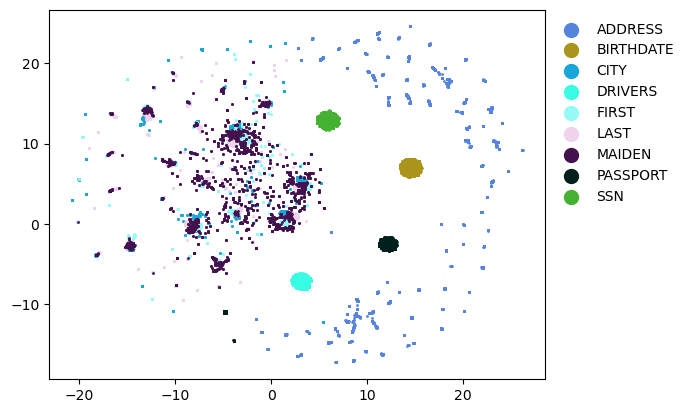

In [458]:

for i in range(len(t)):
    plt.scatter(dfu[dfu['label']==t[i]]['X1'], dfu[dfu['label']==t[i]]['X2'], s=1, label=t[i], color=color[i])


plt.legend( bbox_to_anchor=(1, 1), markerscale=10, frameon=False)

In [345]:
df1['label1']

0                          Id
1                   BIRTHDATE
2                         SSN
6                       FIRST
7                        LAST
                 ...         
259387                   CITY
259388                  STATE
259389                 COUNTY
259390    HEALTHCARE_EXPENSES
259391    HEALTHCARE_COVERAGE
Name: label1, Length: 227830, dtype: category
Categories (21, object): ['ADDRESS', 'BIRTHDATE', 'BIRTHPLACE', 'CITY', ..., 'RACE', 'SSN', 'STATE', 'SUFFIX']

In [ ]:
# https://stackoverflow.com/a/30443504/13981285



In [548]:
from sklearn.pipeline import make_pipeline

In [549]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [550]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [551]:
logistic_model = LogisticRegression(solver='liblinear').fit(x_train, y_train)

In [552]:
# training score
logistic_model.score(x_train, y_train)

0.7803785369270506

In [553]:
y_pred = logistic_model.predict(x_test)

In [554]:
# accuracy score
accuracy_score(y_test, y_pred)

0.7839899213456366

In [560]:
lr_probs = logistic_model.predict_proba(x_test)

In [561]:
lr_probs.shape
# samples x labels

(29369, 9)

In [578]:
# https://stackoverflow.com/a/66022487/13981285
# study which multi_class to use and why; there are two options
# more here: https://towardsdatascience.com/multiclass-classification-evaluation-with-roc-curves-and-roc-auc-294fd4617e3a
lr_auc = metrics.roc_auc_score(y_test, lr_probs, multi_class='ovr')
lr_auc

0.9512164762617683

In [583]:
# from sklearn.metrics import roc_curve

# scores = cross_val_score(logistic_model, x_train, y_train, cv=10)
# print('Cross-Validation Accuracy Scores', scores)
# scores = pd.Series(scores)
# scores.min(), scores.mean(), scores.max()

In [588]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

In [595]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = list(dict(enumerate(cats)).values()))



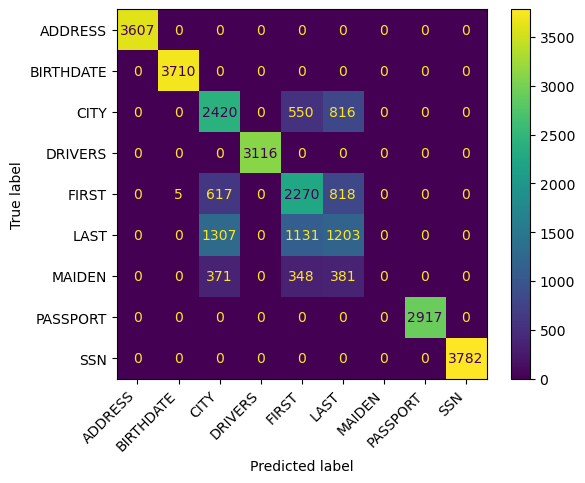

In [597]:
cm_display.plot()
plt.xticks(rotation=45, ha='right')
plt.show()